In [ ]:
! gdown --id 1Ny0HGJD__kvrAX8pycEPzJgLk0gpRcwW

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ny0HGJD__kvrAX8pycEPzJgLk0gpRcwW
To: /content/messidor_data.csv
100% 48.0k/48.0k [00:00<00:00, 93.0MB/s]


In [ ]:
! gdown --id 1EYV7SObEvkgrvzpKM1zEl-cAYkMRZM5E

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EYV7SObEvkgrvzpKM1zEl-cAYkMRZM5E
To: /content/images.zip
100% 2.46G/2.46G [00:35<00:00, 70.1MB/s]


In [ ]:
 ! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-27 18:03:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-27 18:03:03 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
from zipfile import ZipFile
file_path = "/content/images.zip"

with ZipFile(file_path, 'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
from glob import glob

In [ ]:
data = pd.read_csv("/content/messidor_data.csv")

In [ ]:
data.head()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0.0,0.0,1
1,20051020_43832_0100_PP.png,1.0,0.0,1
2,20051020_43882_0100_PP.png,1.0,0.0,1
3,20051020_43906_0100_PP.png,2.0,1.0,1
4,20051020_44261_0100_PP.png,0.0,0.0,1


In [ ]:
img_paths = glob('/content/IMAGES/*')

In [ ]:
len(img_paths)

1748

In [ ]:
data.head()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0.0,0.0,1
1,20051020_43832_0100_PP.png,1.0,0.0,1
2,20051020_43882_0100_PP.png,1.0,0.0,1
3,20051020_43906_0100_PP.png,2.0,1.0,1
4,20051020_44261_0100_PP.png,0.0,0.0,1


In [ ]:
data['Image_paths'] = img_paths
data.tail()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable,Image_paths
1743,IM004806.jpg,0.0,0.0,1,/content/IMAGES/IM004508.JPG
1744,IM004811.jpg,1.0,0.0,1,/content/IMAGES/20051202_55607_0400_PP.png
1745,IM004812.jpg,2.0,0.0,1,/content/IMAGES/IM001145.JPG
1746,IM004831.jpg,0.0,0.0,1,/content/IMAGES/20060412_60337_0200_PP.png
1747,IM004832.jpg,0.0,0.0,1,/content/IMAGES/IM001866.JPG


In [ ]:
def f(a):
  return str(a)
data['adjudicated_dr_grade'] = data['adjudicated_dr_grade'].apply(f)

In [ ]:
data.head()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable,Image_paths
0,20051020_43808_0100_PP.png,0.0,0.0,1,/content/IMAGES/IM004169.JPG
1,20051020_43832_0100_PP.png,1.0,0.0,1,/content/IMAGES/20060412_52245_0200_PP.png
2,20051020_43882_0100_PP.png,1.0,0.0,1,/content/IMAGES/20060412_58368_0200_PP.png
3,20051020_43906_0100_PP.png,2.0,1.0,1,/content/IMAGES/20051020_61998_0100_PP.png
4,20051020_44261_0100_PP.png,0.0,0.0,1,/content/IMAGES/IM004305.JPG


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Image_paths'],data['adjudicated_dr_grade'],test_size=0.1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [ ]:
x_train

1197    /content/IMAGES/20060410_40403_0200_PP.png
1178    /content/IMAGES/20060412_60396_0200_PP.png
1526                  /content/IMAGES/IM001797.JPG
299     /content/IMAGES/20051021_40450_0100_PP.png
429     /content/IMAGES/20060523_45300_0100_PP.png
                           ...                    
575                   /content/IMAGES/IM003641.JPG
1684                  /content/IMAGES/IM002946.JPG
1002    /content/IMAGES/20051020_62510_0100_PP.png
935     /content/IMAGES/20051214_56971_0100_PP.png
861     /content/IMAGES/20051021_51994_0100_PP.png
Name: Image_paths, Length: 1415, dtype: object

In [ ]:
train = pd.DataFrame()
train['Img_path'] = x_train
train['Retinopathy_grade'] = y_train

valid = pd.DataFrame()
train['Img_path'] = x_valid
train['Retinopathy_grade'] = y_valid

test = pd.DataFrame()
train['Img_path'] = x_test
train['Retinopathy_grade'] = y_test

In [ ]:
train.head()

,Img_path,Retinopathy_grade
1197,NaN,NaN
1178,NaN,NaN
1526,NaN,NaN
299,NaN,NaN
429,NaN,NaN


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
Img_shape = (512,512)
batch_size = 32

train_data = train_gen.flow_from_dataframe(data[0:1398],
                                           x_col = "Image_paths",
                                           y_col = "adjudicated_dr_grade",
                                           target_size = Img_shape,
                                           class_model = 'categorical',
                                           batch_size = batch_size,
                                           shuffle = True,
                                           classes = ['0.0','1.0','2.0','3.0','4.0'])

valid_data = valid_gen.flow_from_dataframe(data[1398:1573],
                                           x_col = "Image_paths",
                                           y_col = "adjudicated_dr_grade",
                                           target_size = Img_shape,
                                           class_model = 'categorical',
                                           batch_size = batch_size,
                                           shuffle = True,
                                           classes = ['0.0','1.0','2.0','3.0','4.0'])

test_data = test_gen.flow_from_dataframe(data[1573:-1],
                                           x_col = "Image_paths",
                                           y_col = "adjudicated_dr_grade",
                                           target_size = Img_shape,
                                           class_model = 'categorical',
                                           batch_size = batch_size,
                                           shuffle = True)

Found 1397 validated image filenames belonging to 5 classes.
Found 174 validated image filenames belonging to 5 classes.
Found 174 validated image filenames belonging to 5 classes.


## Model 1 - DenseNet121 no extra layers, no data augmentation, no class balancing

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-100]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(5, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = input, outputs = x)

In [ ]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1310725   
                                                                 
Total params: 8,348,229
Trainable params: 8,264,581
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model1.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
           )

Epoch 1/15
44/44 [==============================] - 142s 3s/step - loss: 1.4001 - accuracy: 0.4445 - val_loss: 6.2095 - val_accuracy: 0.0862
Epoch 2/15
44/44 [==============================] - 97s 2s/step - loss: 1.1861 - accuracy: 0.5075 - val_loss: 1.0051 - val_accuracy: 0.6724
Epoch 3/15
44/44 [==============================] - 92s 2s/step - loss: 1.1090 - accuracy: 0.5447 - val_loss: 0.9155 - val_accuracy: 0.7816
Epoch 4/15
44/44 [==============================] - 92s 2s/step - loss: 0.9827 - accuracy: 0.6163 - val_loss: 1.6742 - val_accuracy: 0.1322
Epoch 5/15
44/44 [==============================] - 91s 2s/step - loss: 0.8640 - accuracy: 0.6285 - val_loss: 1.2285 - val_accuracy: 0.5057
Epoch 6/15
44/44 [==============================] - 92s 2s/step - loss: 0.6700 - accuracy: 0.7437 - val_loss: 1.0189 - val_accuracy: 0.7759
Epoch 7/15
44/44 [==============================] - 92s 2s/step - loss: 0.4975 - accuracy: 0.8218 - val_loss: 2.3940 - val_accuracy: 0.2241
Epoch 8/15
44/44 [=

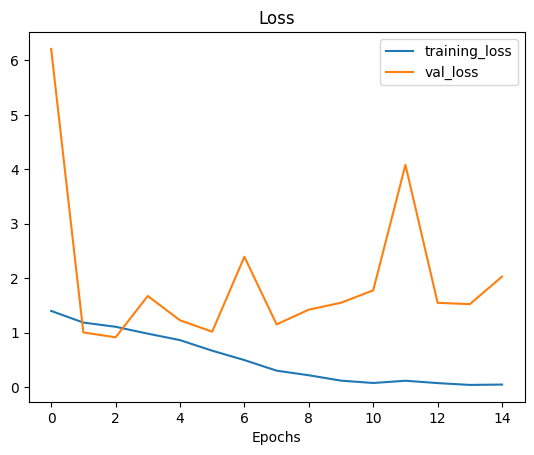

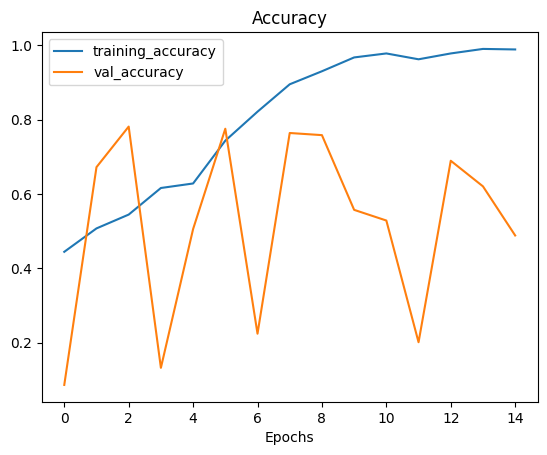

In [ ]:
plot_loss_curves(history1)

In [ ]:
model1.evaluate(test_data)

6/6 [==============================] - 10s 2s/step - loss: 1.4599 - accuracy: 0.6379


[1.4599337577819824, 0.6379310488700867]

In [ ]:
model1.save("DenseNet.h5")

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-200]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(5, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = input, outputs = x)

In [ ]:
model2.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
           )

Epoch 1/15
44/44 [==============================] - 141s 2s/step - loss: 1.3072 - accuracy: 0.4903 - val_loss: 31.5414 - val_accuracy: 0.0115
Epoch 2/15
44/44 [==============================] - 97s 2s/step - loss: 1.2108 - accuracy: 0.5283 - val_loss: 3.9960 - val_accuracy: 0.0747
Epoch 3/15
44/44 [==============================] - 97s 2s/step - loss: 1.2140 - accuracy: 0.5168 - val_loss: 1.2396 - val_accuracy: 0.7759
Epoch 4/15
44/44 [==============================] - 97s 2s/step - loss: 1.1831 - accuracy: 0.5240 - val_loss: 4.5708 - val_accuracy: 0.0862
Epoch 5/15
44/44 [==============================] - 97s 2s/step - loss: 1.1594 - accuracy: 0.5283 - val_loss: 2.2677 - val_accuracy: 0.0920
Epoch 6/15
44/44 [==============================] - 97s 2s/step - loss: 1.0920 - accuracy: 0.5533 - val_loss: 1.7981 - val_accuracy: 0.2241
Epoch 7/15
44/44 [==============================] - 95s 2s/step - loss: 1.0269 - accuracy: 0.5841 - val_loss: 10.1284 - val_accuracy: 0.0230
Epoch 8/15
44/44 

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-150]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(5, activation = 'softmax')(x)

model3 = tf.keras.Model(inputs = input, outputs = x)

In [ ]:
model3.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
           )

Epoch 1/15
44/44 [==============================] - 126s 2s/step - loss: 1.3008 - accuracy: 0.4989 - val_loss: 4.7184 - val_accuracy: 0.0862
Epoch 2/15
44/44 [==============================] - 95s 2s/step - loss: 1.2420 - accuracy: 0.5233 - val_loss: 1.6708 - val_accuracy: 0.0920
Epoch 3/15
44/44 [==============================] - 95s 2s/step - loss: 1.1921 - accuracy: 0.5225 - val_loss: 1.0634 - val_accuracy: 0.7759
Epoch 4/15
44/44 [==============================] - 95s 2s/step - loss: 1.1763 - accuracy: 0.5276 - val_loss: 0.9591 - val_accuracy: 0.7644
Epoch 5/15
44/44 [==============================] - 96s 2s/step - loss: 1.1079 - accuracy: 0.5326 - val_loss: 1.3149 - val_accuracy: 0.7701
Epoch 6/15
44/44 [==============================] - 94s 2s/step - loss: 1.0491 - accuracy: 0.5784 - val_loss: 2.1546 - val_accuracy: 0.3448
Epoch 7/15
44/44 [==============================] - 94s 2s/step - loss: 0.8735 - accuracy: 0.6550 - val_loss: 3.9907 - val_accuracy: 0.1149
Epoch 8/15
44/44 [=

In [ ]:
model3.evaluate(test_data)

6/6 [==============================] - 10s 1s/step - loss: 2.6823 - accuracy: 0.8448


[2.6823232173919678, 0.8448275923728943]

In [ ]:
model3.save('DenseNet3.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread('/content/20051020_43808_0100_PP.png')

In [ ]:
img = img/255.
img = tf.constant(img)
img = tf.image.resize(img, size=(512,512))

In [ ]:
img = tf.expand_dims(img, axis = 0)

In [ ]:
arr = model3.predict(img)

1/1 [==============================] - 0s 32ms/step


In [ ]:
arr

array([[0.544276  , 0.13390066, 0.15916179, 0.05690798, 0.10575356]],
      dtype=float32)

In [ ]:
tf.argmax(arr[0])

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
data[data['adjudicated_dr_grade'] == '4.0']

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable,Image_paths
22,20051020_45110_0100_PP.png,4.0,1.0,1,/content/IMAGES/IM004797.JPG
23,20051020_45137_0100_PP.png,4.0,1.0,1,/content/IMAGES/IM004312.JPG
42,20051020_61998_0100_PP.png,4.0,0.0,1,/content/IMAGES/IM004398.JPG
50,20051020_62709_0100_PP.png,4.0,0.0,1,/content/IMAGES/20051130_60490_0400_PP.png
51,20051020_62802_0100_PP.png,4.0,0.0,1,/content/IMAGES/IM000473.JPG
88,20051021_40377_0100_PP.png,4.0,1.0,1,/content/IMAGES/20051109_57843_0400_PP.png
89,20051021_40450_0100_PP.png,4.0,1.0,1,/content/IMAGES/20051202_55582_0400_PP.png
99,20051021_52127_0100_PP.png,4.0,0.0,1,/content/IMAGES/IM004621.JPG
112,20051021_59459_0100_PP.png,4.0,1.0,1,/content/IMAGES/IM003925.JPG
113,20051021_59504_0100_PP.png,4.0,1.0,1,/content/IMAGES/20060522_46104_0100_PP.png


In [ ]:
tf.math.confusion_matrix(tf.cast(tf.constant(data['adjudicated_dr_grade'][1573:-1]), dtype = tf.int64),tf.argmaxmodel3.predict(test_data))

UnimplementedError: ignored

In [ ]:
for i in model3.predict(test_data):
  print(tf.argmax(i))

6/6 [==============================] - 10s 2s/step
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, 